In [62]:
from sklearn.preprocessing import scale
from surprise import SVD, SVDpp, BaselineOnly, KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate, train_test_split

In [63]:
import pandas as pd

### Read Ratings Data

In [64]:
ratings = pd.read_csv('./data/train.csv')
ratings.head()

,User_Id,Book_Id,Rating
0,114,101170,8
1,169,93424,7
2,183,266719,7
3,183,331686,7
4,183,368596,7


In [31]:
len(ratings['User_Id'].unique())

65053

In [32]:
len(ratings['Book_Id'].unique())

154621

In [36]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings, reader)

### Experiment with a few models

In [17]:
cross_validate(BaselineOnly(), data, measures=['RMSE'], cv=10, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.6404  1.6516  1.6565  1.6517  1.6439  1.6429  1.6410  1.6484  1.6566  1.6506  1.6483  0.0057  
MAE (testset)     1.2795  1.2768  1.2848  1.2825  1.2817  1.2730  1.2726  1.2782  1.2858  1.2806  1.2796  0.0043  
Fit time          1.82    1.91    1.97    1.99    2.02    1.99    1.98    2.01    1.98    1.97    1.96    0.05    
Test time         0.18    0.17    0.35    0.17    0.30    0.17    0.17    0.17    0.31    0.17    0.21    0.07    


{'test_rmse': array([1.64035871, 1.6516192 , 1.65646442, 1.65174803, 1.64387064,
        1.64288313, 1.64099343, 1.64838811, 1.65657639, 1.65055562]),
 'test_mae': array([1.27949109, 1.27677656, 1.28482268, 1.28251612, 1.28173684,
        1.27303248, 1.27263084, 1.27819191, 1.2858192 , 1.28060143]),
 'fit_time': (1.8245670795440674,
  1.913559913635254,
  1.9697940349578857,
  1.9859070777893066,
  2.017472982406616,
  1.9940779209136963,
  1.9795818328857422,
  2.007594108581543,
  1.9845669269561768,
  1.9717018604278564),
 'test_time': (0.17700815200805664,
  0.16671323776245117,
  0.3468489646911621,
  0.1673750877380371,
  0.30382800102233887,
  0.16856694221496582,
  0.16748905181884766,
  0.17059993743896484,
  0.30537891387939453,
  0.16700315475463867)}

In [8]:
cross_validate(KNNWithMeans(sim_options={'name': 'cosine','user_based': True}, k=10),
               data, measures=['RMSE'], cv=10, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.8498  1.8547  1.8335  1.8313  1.8372  1.8234  

{'test_rmse': array([1.84980278, 1.85468974, 1.83346668, 1.83132629, 1.83718233,
        1.82342555, 1.84151089, 1.83262617, 1.85301496, 1.82746491]),
 'fit_time': (273.4564709663391,
  286.44485807418823,
  277.22668957710266,
  282.701895236969,
  276.76915884017944,
  274.86271476745605,
  274.5365397930145,
  266.6601312160492,
  380.3195300102234,
  65911.32727193832),
 'test_time': (1.6422569751739502,
  1.9424610137939453,
  1.663651943206787,
  1.6305327415466309,
  1.9365661144256592,
  1.6698250770568848,
  1.9496912956237793,
  1.6147489547729492,
  3.4971721172332764,
  2.7631051540374756)}

### Visualize Results

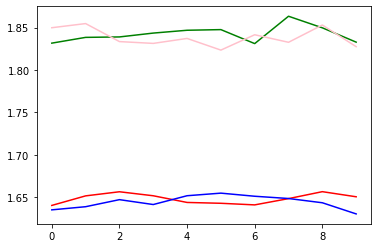

In [9]:
import matplotlib.pyplot as plt
plt.plot([1.64035871, 1.6516192 , 1.65646442, 1.65174803, 1.64387064,
        1.64288313, 1.64099343, 1.64838811, 1.65657639, 1.65055562], color='red') # Baseline no norm
plt.plot([1.6351393 , 1.63885243, 1.64715879, 1.64141364, 1.65178808,
        1.6548407 , 1.6511768 , 1.64851284, 1.64350086, 1.63035403], color='blue') # SVD no normalization
plt.plot([1.83162642, 1.83842444, 1.83894032, 1.84348497, 1.84681301,
        1.84757849, 1.83108851, 1.86333115, 1.84969944, 1.83280018], color='green') # mean KNN with MSD sim metric
plt.plot([1.84980278, 1.85468974, 1.83346668, 1.83132629, 1.83718233,
        1.82342555, 1.84151089, 1.83262617, 1.85301496, 1.82746491], color='pink') # mean KNN with cosine sim metric
plt.show()

### Evaluation
1. 10-fold SVD, no normalization =
  - [1.6351393 , 1.63885243, 1.64715879, 1.64141364, 1.65178808, 1.6548407 , 1.6511768 , 1.64851284, 1.64350086, 1.63035403]
2. 10-fold Baseline, no normalization =
  - [1.64035871, 1.6516192 , 1.65646442, 1.65174803, 1.64387064, 1.64288313, 1.64099343, 1.64838811, 1.65657639, 1.65055562]
3. 10-fold KNN with mean rating normalization and MSD similarity =
  - [1.83162642, 1.83842444, 1.83894032, 1.84348497, 1.84681301, 1.84757849, 1.83108851, 1.86333115, 1.84969944, 1.83280018]

### Grid Search on the best model from above
- RMSE = 1.6501662923469678, params = {'n_epochs': 100, 'n_factors': 250}
- Matrix factorization does better with less latent factors, more epochs did not affect performance much

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [50, 100], 'n_factors': [250, 500, 1000]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

### Make predictions

In [45]:
algo = SVD()
algo.fit(data.build_full_trainset())

In [81]:
test_ratings = pd.read_csv('./data/test.csv')
preds = []

for rating_tuple in test_ratings.values:
    user_id = rating_tuple[0]
    book_id = rating_tuple[1]
    sample_key = "{0}-{1}".format(user_id, book_id)
    pred = algo.predict(user_id, book_id, verbose=False)

    preds.append({'User_Id-Book_Id': sample_key, 'Rating': pred[3]})

In [82]:
preds_df = pd.DataFrame(preds)
preds_df.head()

,User_Id-Book_Id,Rating
0,242-343676,8.279989
1,254-58191,7.381760
2,503-76983,8.308763
3,626-340144,7.940903
4,628-261446,7.231615


In [60]:
preds_df['Rating'].describe()

count    100000.000000
mean          7.661599
std           0.745285
min           2.108299
25%           7.338111
50%           7.603539
75%           8.017698
max          10.000000
Name: Rating, dtype: float64

In [66]:
ratings['Rating'].describe()

count    333627.000000
mean          7.603539
std           1.842235
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Rating, dtype: float64

In [80]:
print (len(preds_df))

100000


In [83]:
preds_df.to_csv('solution.csv', index=False)

### Explore Book metadata

In [9]:
metadata = pd.read_csv('./data/Book_Info.csv')

In [10]:
metadata.head()

,BOOK_ID,Title,Author,Publication_Year,Publisher_Name,Image_S_URL,Image_M_URL,Image_L_URL
0,249992,Zombies,Bret Easton Ellis,2000,18-Oct,http://images.amazon.com/images/P/2264026545.0...,http://images.amazon.com/images/P/2264026545.0...,http://images.amazon.com/images/P/2264026545.0...
1,235568,The Wicked Priest: An Allegory in Two Acts,Bob Levis,2000,1stBooks Library,http://images.amazon.com/images/P/1587214768.0...,http://images.amazon.com/images/P/1587214768.0...,http://images.amazon.com/images/P/1587214768.0...
2,218052,The Wondering Life,Colleen Cherwinski,2003,1stBooks Library,http://images.amazon.com/images/P/1414025696.0...,http://images.amazon.com/images/P/1414025696.0...,http://images.amazon.com/images/P/1414025696.0...
3,217941,Power Health - Back to Basics,Dr Martin P. Rutherford,2003,1stBooks Library,http://images.amazon.com/images/P/1410775488.0...,http://images.amazon.com/images/P/1410775488.0...,http://images.amazon.com/images/P/1410775488.0...
4,242438,"See a Grown Man Cry, Now Watch Him Die",Henry Rollins,1997,2.13.61 Publications,http://images.amazon.com/images/P/1880985373.0...,http://images.amazon.com/images/P/1880985373.0...,http://images.amazon.com/images/P/1880985373.0...


- Year to decade
- Named entities from the title
- Genre (based on title, image, and author?)
- Sentiment of the title
- Publisher name

In [24]:
len(metadata['Author'].unique())

102028

In [25]:
len(metadata['Publisher_Name'].unique())

16806